In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
import plotly.offline as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from wrangle import get_assessment_users

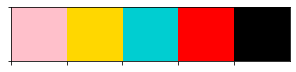

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']

# Set your custom color palette
my_pal = sns.color_palette(heat)

sns.palplot(my_pal)

# Read In df

In [3]:
df = pd.read_csv('train_maybe_final.csv')

In [4]:
df = df.sort_values(by='date')

In [9]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
5347944,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday
5348214,b2dba42b,e9863be110886d86,2019-07-23 22:07:51.144000+00:00,"{""description"":""Try making a long wall."",""iden...",f90e8b6e,102,3010,88394,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday


In [7]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [8]:
df.shape

(5513024, 18)

In [11]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
5347944,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday
5348214,b2dba42b,e9863be110886d86,2019-07-23 22:07:51.144000+00:00,"{""description"":""Try making a long wall."",""iden...",f90e8b6e,102,3010,88394,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday


# Games-Only df

- 25,488 game_times with 0 values

- all of the above observations have event_codes of 2000, start event

- I will look at all of the event codes that have 0 game_time values to see if I want to drop those rows.

In [12]:
games_df = df[df.type == 'Game']
(games_df[games_df.game_time == 0]).event_code.value_counts()

2000    24378
Name: event_code, dtype: int64

In [13]:
games_df.shape

(2650972, 18)

## Drop event_code rows with 0 value in game_time

In [14]:
(df[df.game_time == 0]).event_code.value_counts()

2000    124982
3010      8285
2020      3933
2025       271
4070        12
Name: event_code, dtype: int64

In [15]:
df = df[df.game_time != 0]

In [16]:
(df[df.game_time == 0]).event_code.value_counts()

Series([], Name: event_code, dtype: int64)

# Create median accuracy col

In [17]:
median = df.groupby('installation_id')[['accuracy']].median()

In [18]:
median

,accuracy
installation_id,
0006a69f,0.500000
0006c192,0.500000
00129856,1.000000
001d0ed0,0.500000
00225f67,0.000000
00279ac5,0.000000
002db7e3,0.200000
003372b0,1.000000
004c2091,1.000000


In [19]:
df = df.merge(median, on='installation_id', how='left')

In [20]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy_x,accuracy_group,date,hour,weekday,accuracy_y
0,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333
1,b2dba42b,e9863be110886d86,2019-07-23 22:07:51.144000+00:00,"{""description"":""Try making a long wall."",""iden...",f90e8b6e,102,3010,88394,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333


In [21]:
df.shape

(5375541, 19)

In [22]:
df.rename(columns={'accuracy_x': 'accuracy', 'accuracy_y': 'median'}, inplace=True)

In [23]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median
0,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333


# Explore world and accuracy

In [167]:
assess = df[df.type == 'Assessment']

## by median

In [168]:
med = assess.groupby(['installation_id', 'title'])[['accuracy']].median()

In [169]:
med.reset_index(inplace=True)

In [171]:
med.head(10)

,installation_id,title,accuracy
0,0006a69f,Bird Measurer (Assessment),0.0
1,0006a69f,Mushroom Sorter (Assessment),1.0
2,0006c192,Bird Measurer (Assessment),0.5
3,0006c192,Cauldron Filler (Assessment),1.0
4,0006c192,Mushroom Sorter (Assessment),0.0
5,00129856,Bird Measurer (Assessment),1.0
6,00129856,Mushroom Sorter (Assessment),NaN
7,001d0ed0,Bird Measurer (Assessment),0.0
8,001d0ed0,Cart Balancer (Assessment),1.0
9,001d0ed0,Chest Sorter (Assessment),0.0


In [180]:
med_title = med.pivot(index='installation_id', columns='title', values='accuracy')

In [181]:
med_title.fillna(value=0, inplace=True)

In [184]:
med_title.reset_index(inplace=True)
med_title.head(1)

title,index,installation_id,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
0,0,0006a69f,0.0,0.0,0.0,0.0,1.0


In [185]:
med_title.columns = ['trash','installation_id', 'bird_med', 'cart_med', 'cauld_med', 'chest_med', 'shroom_med']

In [186]:
med_title.head(1)

,trash,installation_id,bird_med,cart_med,cauld_med,chest_med,shroom_med
0,0,0006a69f,0.0,0.0,0.0,0.0,1.0


In [187]:
med_title.drop(columns='trash', inplace=True)

In [188]:
med_title.head(1)

,installation_id,bird_med,cart_med,cauld_med,chest_med,shroom_med
0,0006a69f,0.0,0.0,0.0,0.0,1.0


## by mean

In [195]:
men = assess.groupby(['installation_id', 'title'])[['accuracy']].mean()
men.reset_index(inplace=True)
men_title = men.pivot(index='installation_id', columns='title', values='accuracy')
men_title.fillna(value=0, inplace=True)
men_title.reset_index(inplace=True)
men_title.columns = ['installation_id', 'bird_mean', 'cart_mean', 'cauld_mean', 'chest_mean', 'shroom_mean']

In [196]:
men_title.head(2)

,installation_id,bird_mean,cart_mean,cauld_mean,chest_mean,shroom_mean
0,0006a69f,0.256637,0.0,0.0,0.0,0.831967
1,0006c192,0.500000,0.0,1.0,0.0,0.000000


## by min

In [200]:
min_ = assess.groupby(['installation_id', 'title'])[['accuracy']].min()
min_.reset_index(inplace=True)
min_title = min_.pivot(index='installation_id', columns='title', values='accuracy')
min_title.fillna(value=0, inplace=True)
min_title.reset_index(inplace=True)
min_title.columns = ['installation_id', 'bird_min', 'cart_min', 'cauld_min', 'chest_min', 'shroom_min']

In [201]:
min_title.head(2)

,installation_id,bird_min,cart_min,cauld_min,chest_min,shroom_min
0,0006a69f,0.0,0.0,0.0,0.0,0.5
1,0006c192,0.5,0.0,1.0,0.0,0.0


## by max

In [202]:
max_ = assess.groupby(['installation_id', 'title'])[['accuracy']].max()
max_.reset_index(inplace=True)
max_title = max_.pivot(index='installation_id', columns='title', values='accuracy')
max_title.fillna(value=0, inplace=True)
max_title.reset_index(inplace=True)
max_title.columns = ['installation_id', 'bird_max', 'cart_max', 'cauld_max', 'chest_max', 'shroom_max']

In [203]:
max_title.head(2)

,installation_id,bird_max,cart_max,cauld_max,chest_max,shroom_max
0,0006a69f,1.0,0.0,0.0,0.0,1.0
1,0006c192,0.5,0.0,1.0,0.0,0.0


## join all four df in installation_id

In [204]:
first = pd.merge(med_title, men_title, on='installation_id', how='left')

In [205]:
second = pd.merge(first, min_title, on='installation_id', how='left')

In [206]:
title_acc = pd.merge(second, max_title, on='installation_id', how='left')

In [211]:
title_acc.head(3)

,installation_id,bird_med,cart_med,cauld_med,chest_med,shroom_med,bird_mean,cart_mean,cauld_mean,chest_mean,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
0,0006a69f,0.0,0.0,0.0,0.0,1.0,0.256637,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0
1,0006c192,0.5,0.0,1.0,0.0,0.0,0.500000,0.0,1.0,0.0,...,0.5,0.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0
2,00129856,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [212]:
title_acc.to_csv('title_acc.csv')

## world viz

In [104]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333,2.204333
1,b2dba42b,e9863be110886d86,2019-07-23 22:07:51.144000+00:00,"{""description"":""Try making a long wall."",""iden...",f90e8b6e,102,3010,88394,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333,1.473233


In [106]:
df.groupby(['world', 'title']).accuracy.median()

world
CRYSTALCAVES    0.166667
MAGMAPEAK       1.000000
TREETOPCITY     0.333333
Name: accuracy, dtype: float64

In [103]:
df.groupby('world').accuracy.count()

world
CRYSTALCAVES    269772
MAGMAPEAK       135202
TREETOPCITY     288267
Name: accuracy, dtype: int64

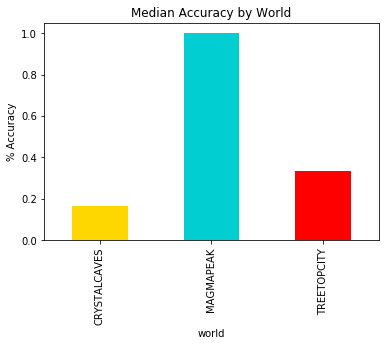

In [101]:
df.groupby('world').accuracy.median().plot(kind='bar', color=my_pal[1:4])

plt.title('Median Accuracy by World')
plt.ylabel('% Accuracy')
plt.show()

In [ ]:
# groupby world for viz



# Create game_mins Col 

- with game_time converted to minutes

In [24]:
df['game_mins'] = df.game_time / 60_000

In [25]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333,2.204333


# Create df with max game_time by game_session

In [26]:
game_time_group = df.groupby(['installation_id', 'game_session','type','date', 'weekday'])[['game_mins']].max().reset_index()

In [27]:
game_time_group.head(5)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
2,0006a69f,1623f262016185e4,Game,2019-08-06,Tuesday,1.341283
3,0006a69f,2b9d5af79bcdb79f,Activity,2019-08-06,Tuesday,1.496117
4,0006a69f,2ecc82dcd2847233,Activity,2019-08-06,Tuesday,1.746933


In [28]:
game_time_group.shape

(60962, 6)

In [29]:
game_time_group.describe()

,game_mins
count,60962.000000
mean,3.039977
std,33.561987
min,0.000317
25%,0.642142
50%,1.297408
75%,2.453250
max,5115.170817


# Total Minutes of game_time by User

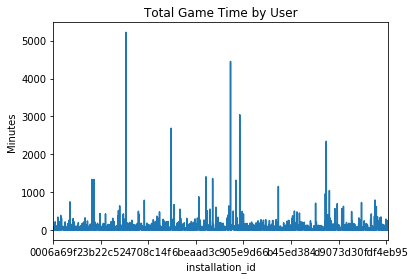

In [30]:
game_time_group.groupby('installation_id').game_mins.sum().plot()

plt.title('Total Game Time by User')
plt.ylabel('Minutes')
plt.show()

In [31]:
# This is the tallest peak above in milliseconds

print(f"The tall peak above is a user with {game_time_group.groupby('installation_id').game_mins.sum().max() / 60} total hours of game time.")
      

The tall peak above is a user with 86.99240999999999 total hours of game time.


## Which weekday has the highest game_time? (total and median)

In [32]:
game_time_group.groupby('weekday')[['game_mins']].sum().sort_values(by='game_mins', ascending=False)

,game_mins
weekday,
Monday,30715.297933
Thursday,29411.389183
Wednesday,27198.528100
Friday,26383.985333
Tuesday,25472.142083
Saturday,23099.183250
Sunday,23042.566067


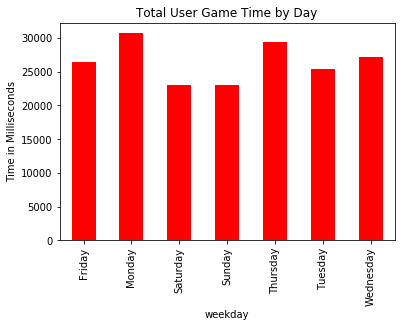

In [69]:
game_time_group.groupby('weekday').game_mins.sum().plot(kind='bar', color=my_pal[3])

plt.title('Total User Game Time by Day')
plt.ylabel('Time in Milliseconds')
plt.show()

In [70]:
# by median game_mins
game_time_group.groupby('weekday')[['game_mins']].median().sort_values(by='game_mins', ascending=False)

,game_mins
weekday,
Saturday,1.350967
Sunday,1.346450
Monday,1.325217
Tuesday,1.273783
Friday,1.262883
Thursday,1.260108
Wednesday,1.259233


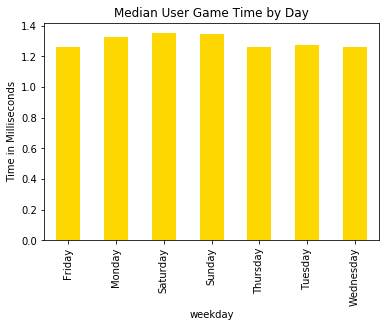

In [72]:
game_time_group.groupby('weekday').game_mins.median().plot(kind='bar', color=my_pal[1])

plt.title('Median User Game Time by Day')
plt.ylabel('Time in Milliseconds')
plt.show()

## Which weekday has the most users logging in?

In [34]:
game_time_group.groupby('weekday').installation_id.nunique().sort_values(ascending=False)

weekday
Friday       1213
Thursday     1192
Tuesday      1120
Wednesday    1107
Monday       1101
Saturday     1021
Sunday        975
Name: installation_id, dtype: int64

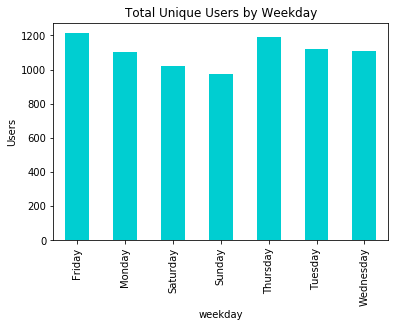

In [66]:
game_time_group.groupby('weekday').installation_id.nunique().plot(kind='bar', color=my_pal[2])

plt.title('Total Unique Users by Weekday')
plt.ylabel('Users')
plt.show()

# How much time are users spending by type?

## Games

In [36]:
games_df = game_time_group[game_time_group.type == 'Game']
games_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
2,0006a69f,1623f262016185e4,Game,2019-08-06,Tuesday,1.341283


In [37]:
print(f'Users are spending a total of {games_df.game_mins.sum()} minutes playing games.')

Users are spending a total of 89652.99011666667 minutes playing games.


## Activities

In [38]:
activities_df = game_time_group[game_time_group.type == 'Activity']
activities_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
3,0006a69f,2b9d5af79bcdb79f,Activity,2019-08-06,Tuesday,1.496117


In [39]:
print(f'Users are spending a total of {activities_df.game_mins.sum()} minutes playing activities.')

Users are spending a total of 70686.14315 minutes playing activities.


## Assessments

In [40]:
assessments_df = game_time_group[game_time_group.type == 'Assessment']
assessments_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
9,0006a69f,6bdf9623adc94d89,Assessment,2019-08-06,Tuesday,0.447117
12,0006a69f,77b8ee947eb84b4e,Assessment,2019-08-06,Tuesday,1.546650


In [41]:
print(f'Users are spending a total of {assessments_df.game_mins.sum()} minutes taking assessments.')

Users are spending a total of 24983.95868333333 minutes taking assessments.


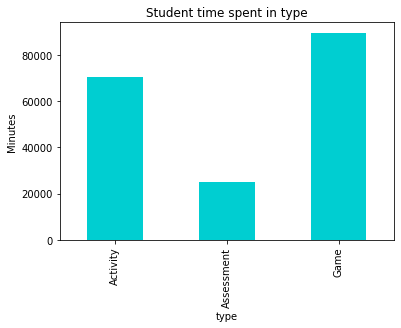

In [76]:
game_time_group.groupby('type').game_mins.sum().plot(kind='bar', color=my_pal[2])

plt.title('Student time spent in type')
plt.ylabel('Minutes')
plt.show()

In [43]:
game_time_group.groupby('type').game_mins.sum()

type
Activity      70686.143150
Assessment    24983.958683
Game          89652.990117
Name: game_mins, dtype: float64

In [44]:
Types=pd.DataFrame()
Types['Type']=game_time_group.groupby('type').game_mins.sum().index
Types['Count']=game_time_group.groupby('type').game_mins.sum().values

py.init_notebook_mode(connected=True)
fig = go.Figure(data=[go.Pie(labels=Types['Type'], values=Types['Count'], hole=0.2)])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=my_pal, line=dict(color='#000000', width=2)))
fig.show()

# What are the first and last logins?

In [45]:
game_time_group.date.min()

'2019-07-23'

In [46]:
game_time_group.date.max()

'2019-10-14'

# Explore Type

In [47]:
game_time_group.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133


In [48]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,cfbd47c8,cebbc7dcfae8cffa,2019-07-23 17:06:06.733000+00:00,"{""weight"":3,""source"":""resources"",""resources"":[...",f90e8b6e,170,4030,132260,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-07-23,17,Tuesday,0.333333,2.204333
1,b2dba42b,e9863be110886d86,2019-07-23 22:07:51.144000+00:00,"{""description"":""Try making a long wall."",""iden...",f90e8b6e,102,3010,88394,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,22,Tuesday,0.333333,1.473233


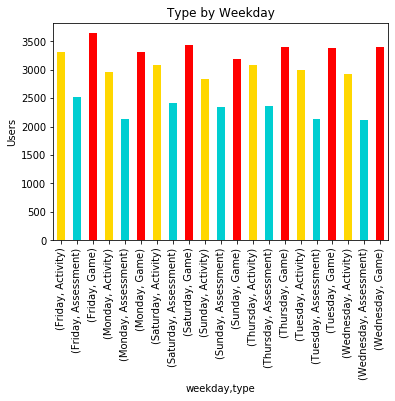

In [49]:
game_time_group.groupby(['weekday', 'type'])['type'].count().plot(kind='bar', label='type', color=my_pal[1:4], legend=False)

plt.title('Type by Weekday')
plt.ylabel('Users')
plt.show()

# Explore titles

In [50]:
game_time_group.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133


## Create the agg df 

In [51]:
agg = game_time_group.groupby(['installation_id', 'type'])[['game_mins']].sum()

In [52]:
agg = agg.reset_index()

In [53]:
game_mins = agg.pivot(index='installation_id', columns='type', values='game_mins')

## Fill NaN with 0 from the game_mins df

In [54]:
game_mins.fillna(value=0, inplace=True)

In [55]:
game_mins.head(2)

type,Activity,Assessment,Game
installation_id,,,
0006a69f,40.428983,3.940483,21.988250
0006c192,20.175500,5.384350,8.822533


In [56]:
game_mins.columns

Index(['Activity', 'Assessment', 'Game'], dtype='object', name='type')

In [57]:
game_mins = game_mins.reset_index()

In [58]:
game_mins.columns = ['installation_id', 'activity_mins', 'assessment_mins', 'game_mins']

In [59]:
game_mins.head()

,installation_id,activity_mins,assessment_mins,game_mins
0,0006a69f,40.428983,3.940483,21.988250
1,0006c192,20.175500,5.384350,8.822533
2,00129856,0.000000,0.662367,0.000000
3,001d0ed0,0.477983,3.319300,4.459850
4,00225f67,3.612000,0.593950,5.462883


In [62]:
game_mins.shape

(3523, 4)

## write game_times csv

In [60]:
game_mins.to_csv('game_mins.csv')